# WeatherPy





In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [56]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [57]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    city_url = url + "appid=" +  weather_api_key +  "&q="+city + '&units='+units 
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    try:
        city_weather=requests.get(city_url).json() # Parse the JSON and retrieve data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max'] 
        city_humidity = city_weather['main']['humidity'] 
        city_clouds = city_weather['clouds']['all'] 
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        city_data.append({"City": city,"Lat": city_lat, "Lng": city_lng,"Max Temp": city_max_temp,"Humidity": city_humidity,"Cloudiness": city_clouds,"Wind Speed": city_wind,"Country": city_country,"Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guerrero negro
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | novo aripuana
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | saint anthony
Processing Record 8 of Set 1 | akdepe
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | yulara
Processing Record 11 of Set 1 | kashima
Processing Record 12 of Set 1 | isangel
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | porto santo
Processing Record 17 of Set 1 | san luis
Processing Record 18 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | kota bahru
Processing Rec

Processing Record 35 of Set 4 | swan hill
Processing Record 36 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 37 of Set 4 | agirish
Processing Record 38 of Set 4 | lagoa
Processing Record 39 of Set 4 | plaster rock
Processing Record 40 of Set 4 | viedma
Processing Record 41 of Set 4 | fayaoue
Processing Record 42 of Set 4 | uva
Processing Record 43 of Set 4 | mersing
Processing Record 44 of Set 4 | komsomolskiy
Processing Record 45 of Set 4 | mizpe ramon
City not found. Skipping...
Processing Record 46 of Set 4 | prince george
Processing Record 47 of Set 4 | multan
Processing Record 48 of Set 4 | amderma
City not found. Skipping...
Processing Record 49 of Set 4 | port lincoln
Processing Record 0 of Set 5 | dimbokro
Processing Record 1 of Set 5 | paracatu
Processing Record 2 of Set 5 | nikel
Processing Record 3 of Set 5 | sioux lookout
Processing Record 4 of Set 5 | san juan
Processing Record 5 of Set 5 | saleaula
City not found. Skipping...
Processing Record 6 of S

Processing Record 24 of Set 8 | maumere
Processing Record 25 of Set 8 | gijon
Processing Record 26 of Set 8 | dmitriyevskoye
Processing Record 27 of Set 8 | quatre cocos
Processing Record 28 of Set 8 | sinop
Processing Record 29 of Set 8 | torbay
Processing Record 30 of Set 8 | yining
Processing Record 31 of Set 8 | kez
Processing Record 32 of Set 8 | shache
Processing Record 33 of Set 8 | doha
Processing Record 34 of Set 8 | manzhouli
Processing Record 35 of Set 8 | ahipara
Processing Record 36 of Set 8 | burica
City not found. Skipping...
Processing Record 37 of Set 8 | benjamin constant
Processing Record 38 of Set 8 | mitsamiouli
Processing Record 39 of Set 8 | berdigestyakh
Processing Record 40 of Set 8 | santa eulalia del rio
City not found. Skipping...
Processing Record 41 of Set 8 | sidhi
Processing Record 42 of Set 8 | khani
Processing Record 43 of Set 8 | chegdomyn
Processing Record 44 of Set 8 | port macquarie
Processing Record 45 of Set 8 | port hardy
Processing Record 46 of

Processing Record 13 of Set 12 | nioro
Processing Record 14 of Set 12 | nouadhibou
Processing Record 15 of Set 12 | plettenberg bay
Processing Record 16 of Set 12 | merauke
Processing Record 17 of Set 12 | esna
Processing Record 18 of Set 12 | abu samrah
Processing Record 19 of Set 12 | macau
Processing Record 20 of Set 12 | shihezi
Processing Record 21 of Set 12 | gornopravdinsk
Processing Record 22 of Set 12 | richards bay
Processing Record 23 of Set 12 | delaware
Processing Record 24 of Set 12 | betanzos
Processing Record 25 of Set 12 | huaihua
Processing Record 26 of Set 12 | sobolevo
Processing Record 27 of Set 12 | pita
Processing Record 28 of Set 12 | helong
Processing Record 29 of Set 12 | esil
Processing Record 30 of Set 12 | mundra
Processing Record 31 of Set 12 | karratha
Processing Record 32 of Set 12 | kuche
City not found. Skipping...
Processing Record 33 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 34 of Set 12 | waingapu
Processing Record 35 of Set

In [58]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# Show Record 

city_data_df.count()


City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [59]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guerrero negro,27.9769,-114.0611,18.85,47,0,5.28,MX,1675556985
1,kapaa,22.0752,-159.3190,24.18,80,75,4.63,US,1675556985
2,esperance,-33.8667,121.9000,21.89,53,0,6.08,AU,1675556986
3,avarua,-21.2078,-159.7750,29.03,79,75,6.69,CK,1675556793
4,novo aripuana,-5.1206,-60.3797,23.88,94,100,0.46,BR,1675556876


In [60]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [61]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guerrero negro,27.9769,-114.0611,18.85,47,0,5.28,MX,1675556985
1,kapaa,22.0752,-159.3190,24.18,80,75,4.63,US,1675556985
2,esperance,-33.8667,121.9000,21.89,53,0,6.08,AU,1675556986
3,avarua,-21.2078,-159.7750,29.03,79,75,6.69,CK,1675556793
4,novo aripuana,-5.1206,-60.3797,23.88,94,100,0.46,BR,1675556876


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

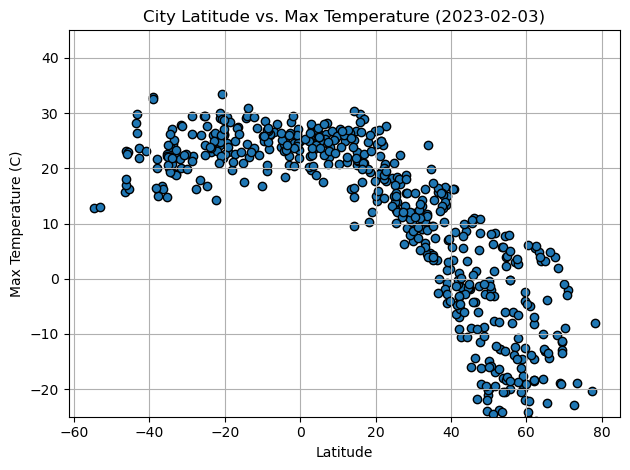

In [62]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df['Lat']
y_value = city_data_df['Max Temp']
plt.scatter(x_value,y_value, marker = 'o', edgecolor = 'black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.ylim([-25,45])
plt.title('City Latitude vs. Max Temperature (2023-02-03)')
# Save the figure
plt.savefig("output_data/Fig1.png")
plt.grid()
plt.tight_layout()
# Show plot
plt.show()

#### Latitude Vs. Humidity

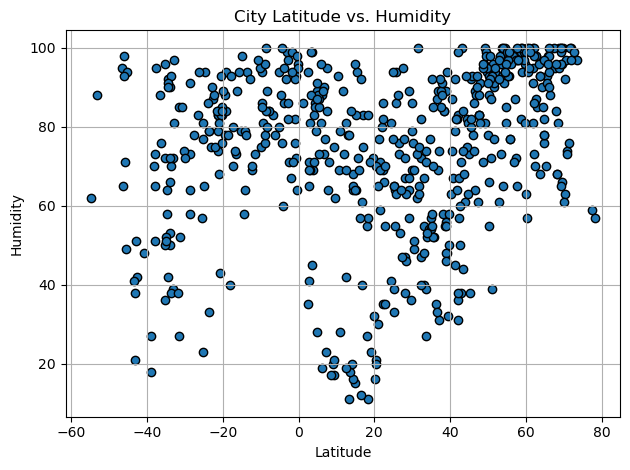

In [63]:
# Build the scatter plots for latitude vs. humidity
x_value = city_data_df['Lat']
y_value = city_data_df['Humidity']
# Incorporate the other graph properties
plt.scatter(x_value,y_value, marker = 'o', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')
# Save the figure
plt.savefig("output_data/Fig2.png")
plt.grid()
plt.tight_layout()
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

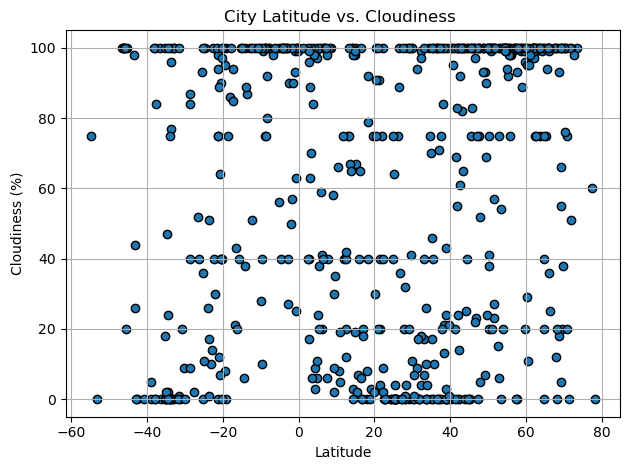

In [64]:
# Build the scatter plots for latitude vs. cloudiness
x_value = city_data_df['Lat']
y_value = city_data_df['Cloudiness']
# Incorporate the other graph properties
plt.scatter(x_value,y_value, marker = 'o', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness ')
plt.grid()
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

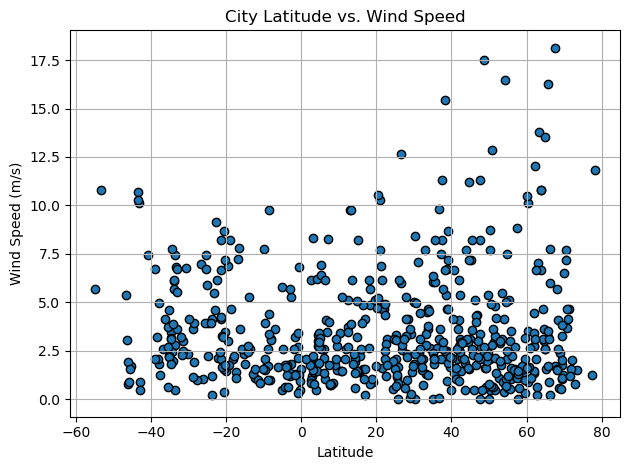

In [65]:
# Build the scatter plots for latitude vs. wind speed
x_value = city_data_df['Lat']
y_value = city_data_df['Wind Speed']
# Incorporate the other graph properties
plt.scatter(x_value,y_value, marker = 'o', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [66]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regression_values, "r-")
    print(f"The r-value is : {rvalue ** 2}")
    return line_eq

In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guerrero negro,27.9769,-114.0611,18.85,47,0,5.28,MX,1675556985
1,kapaa,22.0752,-159.3190,24.18,80,75,4.63,US,1675556985
6,saint anthony,45.0205,-93.2180,-1.86,73,0,3.09,US,1675556945
7,akdepe,42.0551,59.3788,1.05,83,24,4.07,TM,1675556987
9,kashima,33.1061,130.0906,6.56,55,17,1.32,JP,1675556797


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,esperance,-33.8667,121.9000,21.89,53,0,6.08,AU,1675556986
3,avarua,-21.2078,-159.7750,29.03,79,75,6.69,CK,1675556793
4,novo aripuana,-5.1206,-60.3797,23.88,94,100,0.46,BR,1675556876
5,ushuaia,-54.8000,-68.3000,12.81,62,75,5.66,AR,1675556986
8,yulara,-25.2406,130.9889,24.22,23,0,7.46,AU,1675556802


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.7463608482415145


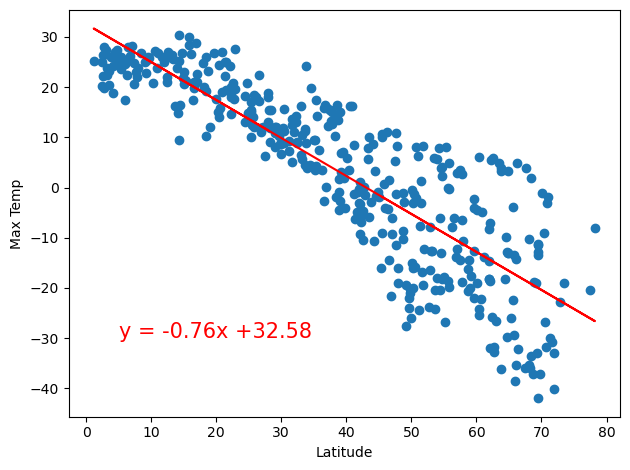

In [69]:
# Linear regression on Northern Hemisphere
North_Regress = Linear_Regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'] )
plt.annotate(North_Regress, (5, -30), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.tight_layout()
plt.show()

The r-value is : 0.1192514846290338


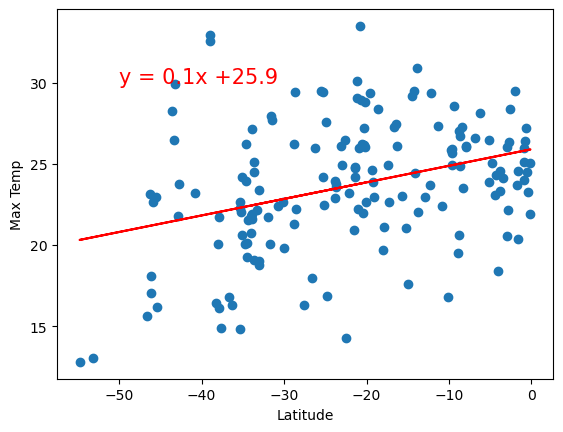

In [71]:
# Linear regression on Southern Hemisphere
Southern_regress = Linear_Regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'] )
plt.annotate(Southern_regress,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()


Northern hemisphere: when the latitude increases from the equator (0 degree) to north pole (90 degrees), the max temp decreases. The R-value is around 74% but the slope is negative indicating negative correlation between the two quantities 
Southern hemisphere- when the latitude increases from the south (-90 deg) to the equator (0 degree) towards north pole (90 degree), the max temp increases. The R-value is around 11.9% and the slope is positive indicating a positive correlation between the two quantities 

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.18520632624256478


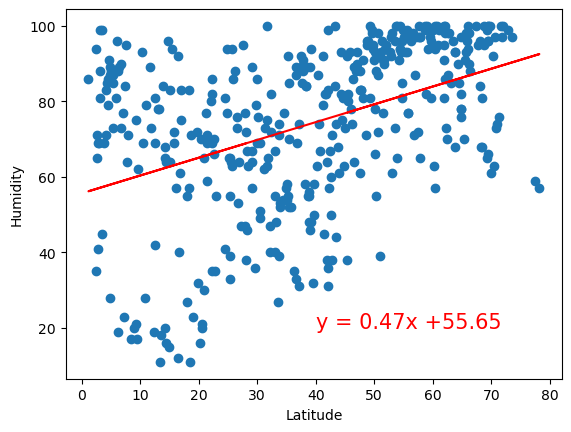

In [73]:
# Northern Hemisphere
Northern_regress = Linear_Regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'] )
plt.annotate(Northern_regress,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


The r-value is : 0.17572269970147225


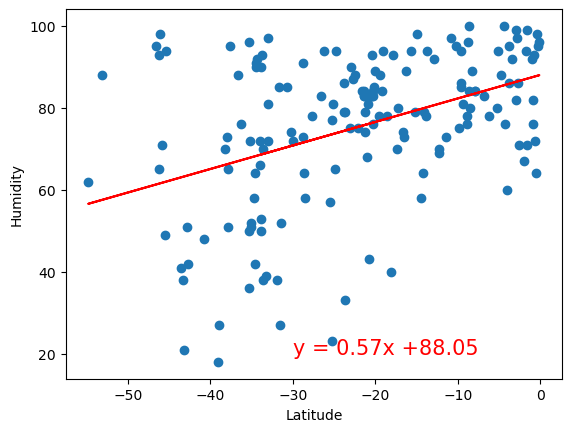

In [74]:
# Southern Hemisphere
southern_regress = Linear_Regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'] )
plt.annotate(southern_regress,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


when it comes to humidity: - both the north and the southern hemispheres have positive correlations. when the latitude increases from south and /or equator to the north, both hemispheres humidity increases 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.06817510681962236


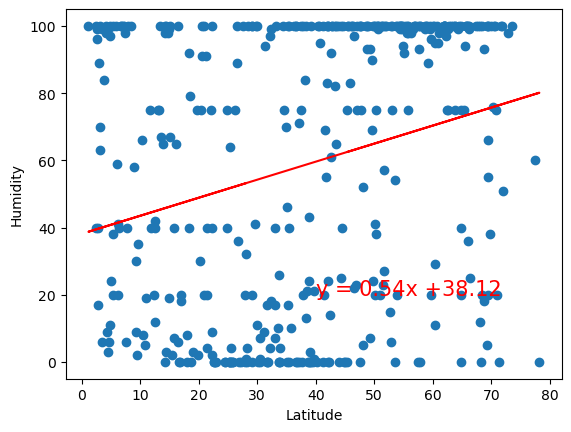

In [76]:
# Northern Hemisphere
northern_regress = Linear_Regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'] )
plt.annotate(northern_regress,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


The r-value is : 0.13517739699766027


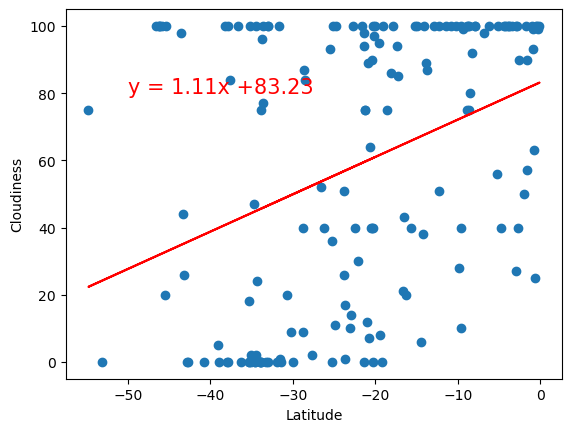

In [77]:
# Southern Hemisphere
southern_regress = Linear_Regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'] )
plt.annotate(southern_regress,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()


Here, the relationship is similar to humidity. positive correlation 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.00542142346556496


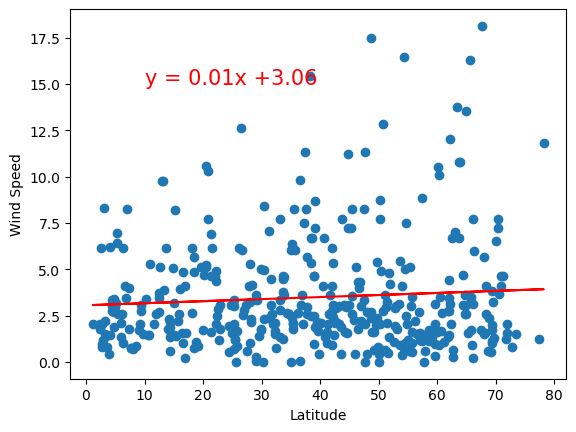

In [78]:
# Northern Hemisphere
northern_regress = Linear_Regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'] )
plt.annotate(northern_regress,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()


The r-value is : 0.06987531399697994


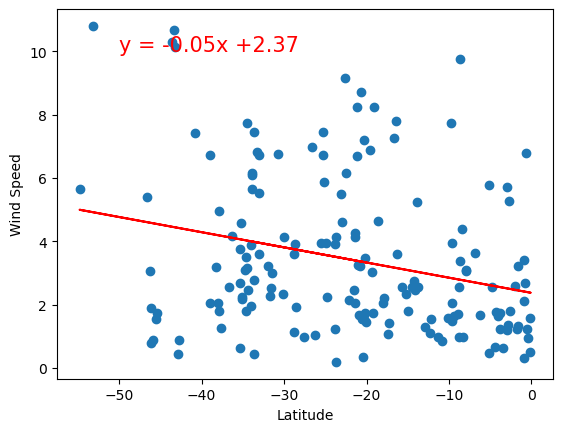

In [79]:
# Southern Hemisphere
southern_regress = Linear_Regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'] )
plt.annotate(southern_regress,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()


In this case- For the northern hemisphere, the wind speed has positive relationship or correlation with latitude
For the southern hemisphere, the wind speed has negative relationship or correlation with latitude
